# IE582 HW4-Yasemin Aylin Akturk

For the codes and R-files please check: https://github.com/BU-IE-582/fall21-yaseminaylinakturk/tree/gh-pages/HW4

In [ ]:
library("randomForest")
library("dplyr")
library("mice") 
library('skimr')
library('ggplot2')
library("data.table")
library("factoextra")
library("cluster")
library("caret")
library("rpart")
library("rattle")
library("glmnet")
library("ranger")

## Data

In [2]:
klasor =  "C:/Users/y.akturk/Documents/"
setwd(klasor)

mymusk <- read.csv("Musk1.csv", header = F)

head(mymusk)
colnames(mymusk)[1:2] <- c("Bag_Class","Bag_Id")

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168
1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26
1,2,42,-191,-142,-65,-117,55,49,-170,...,-238,-300,61,51,127,143,42,-31,14,26


In [3]:
colnames(mymusk)[1:2] <- c("Bag_Class","Bag_Id")
head(mymusk)

Bag_Class,Bag_Id,V3,V4,V5,V6,V7,V8,V9,V10,...,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168
1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26
1,2,42,-191,-142,-65,-117,55,49,-170,...,-238,-300,61,51,127,143,42,-31,14,26


In [4]:
#show structure
str(mymusk)

nrow(mymusk)
ncol(mymusk)

'data.frame':	476 obs. of  168 variables:
 $ Bag_Class: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Bag_Id   : int  1 1 1 1 2 2 2 2 3 3 ...
 $ V3       : int  42 42 42 42 42 42 42 42 40 44 ...
 $ V4       : int  -198 -191 -191 -198 -198 -191 -190 -199 -173 -159 ...
 $ V5       : int  -109 -142 -142 -110 -102 -142 -142 -102 -142 -63 ...
 $ V6       : int  -75 -65 -75 -65 -75 -65 -75 -65 13 -74 ...
 $ V7       : int  -117 -117 -117 -117 -117 -117 -117 -117 -116 -117 ...
 $ V8       : int  11 55 11 55 10 55 12 55 -7 17 ...
 $ V9       : int  23 49 49 23 24 49 49 23 50 5 ...
 $ V10      : int  -88 -170 -161 -95 -87 -170 -161 -94 -171 -114 ...
 $ V11      : int  -28 -45 -45 -28 -28 -45 -45 -29 -44 -31 ...
 $ V12      : int  -27 5 -28 5 -28 6 -29 6 -103 -33 ...
 $ V13      : int  -232 -325 -278 -301 -233 -324 -277 -299 -321 -287 ...
 $ V14      : int  -212 -115 -115 -212 -212 -114 -114 -212 -117 -243 ...
 $ V15      : int  -66 -107 -67 -107 -67 -106 -68 -106 -242 -73 ...
 $ V16      : int  -286 -281 -27

[1] 476

[1] 168

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,Bag_Class,Bag_Id,V3,V4,V5,V6,V7,V8,V9,V10,...,V160,V161,V162,V163,V164,V165,V166,V167,V168,
476,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


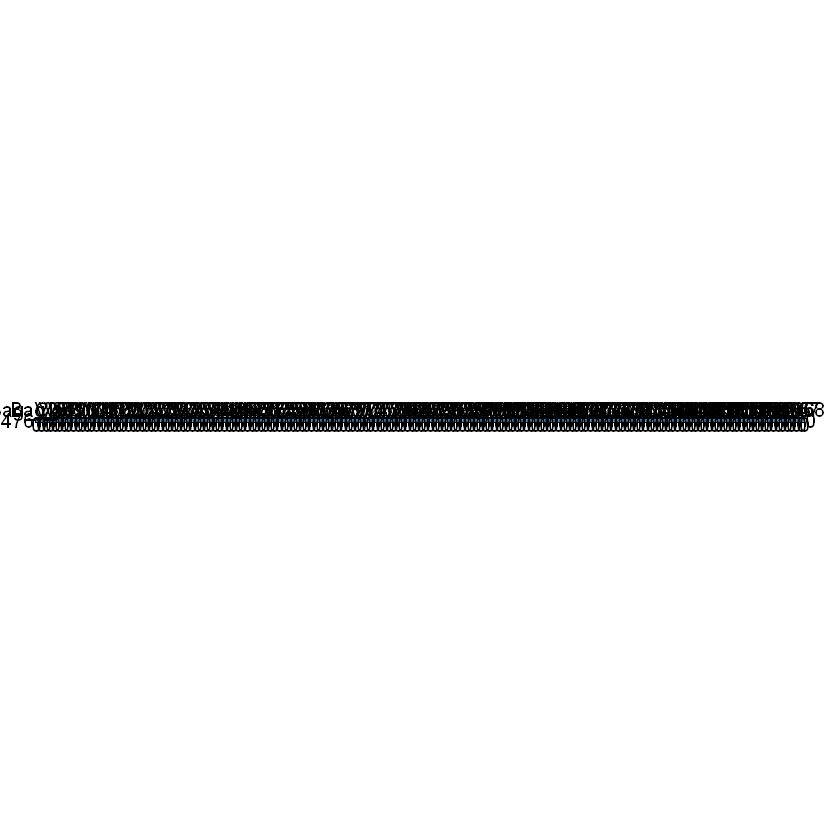

In [5]:
#check NA
md.pattern(mymusk)

#non of them has N/A values.

In [6]:
#duplicated?
sum(duplicated(mymusk))
#no dublicated instances

[1] 0

In [7]:
#quick look
skim(mymusk)


-- Data Summary ------------------------
                           Values
Name                       mymusk
Number of rows             476   
Number of columns          168   
_______________________          
Column type frequency:           
  numeric                  168   
________________________         
Group variables            None  

-- Variable type: numeric ------------------------------------------------------
# A tibble: 168 x 11
    skim_variable n_missing complete_rate     mean      sd    p0     p25    p50
  * <chr>             <int>         <dbl>    <dbl>   <dbl> <dbl>   <dbl>  <dbl>
  1 Bag_Class             0             1    0.435   0.496     0    0       0  
  2 Bag_Id                0             1   52.4    26.9       1   29      56.5
  3 V3                    0             1   38.7    18.1      -9   31      42  
  4 V4                    0             1 -120.     88.3    -199 -193    -144. 
  5 V5                    0             1  -79.2    69.2    -166 -144 

In [8]:
#quick look
summary(mymusk)


   Bag_Class          Bag_Id            V3               V4        
 Min.   :0.0000   Min.   : 1.00   Min.   : -9.00   Min.   :-199.0  
 1st Qu.:0.0000   1st Qu.:29.00   1st Qu.: 31.00   1st Qu.:-193.0  
 Median :0.0000   Median :56.50   Median : 42.00   Median :-144.5  
 Mean   :0.4349   Mean   :52.39   Mean   : 38.73   Mean   :-120.1  
 3rd Qu.:1.0000   3rd Qu.:81.00   3rd Qu.: 50.00   3rd Qu.:-101.0  
 Max.   :1.0000   Max.   :92.00   Max.   :130.00   Max.   :  98.0  
       V5                V6               V7               V8          
 Min.   :-166.00   Min.   :-115.0   Min.   :-117.0   Min.   :-184.000  
 1st Qu.:-144.00   1st Qu.: -53.0   1st Qu.:-117.0   1st Qu.: -89.000  
 Median :-108.00   Median :  28.0   Median :-117.0   Median :  11.000  
 Mean   : -79.24   Mean   :  15.9   Mean   :-112.3   Mean   :  -9.761  
 3rd Qu.: -21.00   3rd Qu.:  38.0   3rd Qu.:-117.0   3rd Qu.:  70.250  
 Max.   :  83.00   Max.   : 157.0   Max.   : 238.0   Max.   : 200.000  
       V9           

[1] 476

[1] 207

[1] 269

[1] 0.4348739

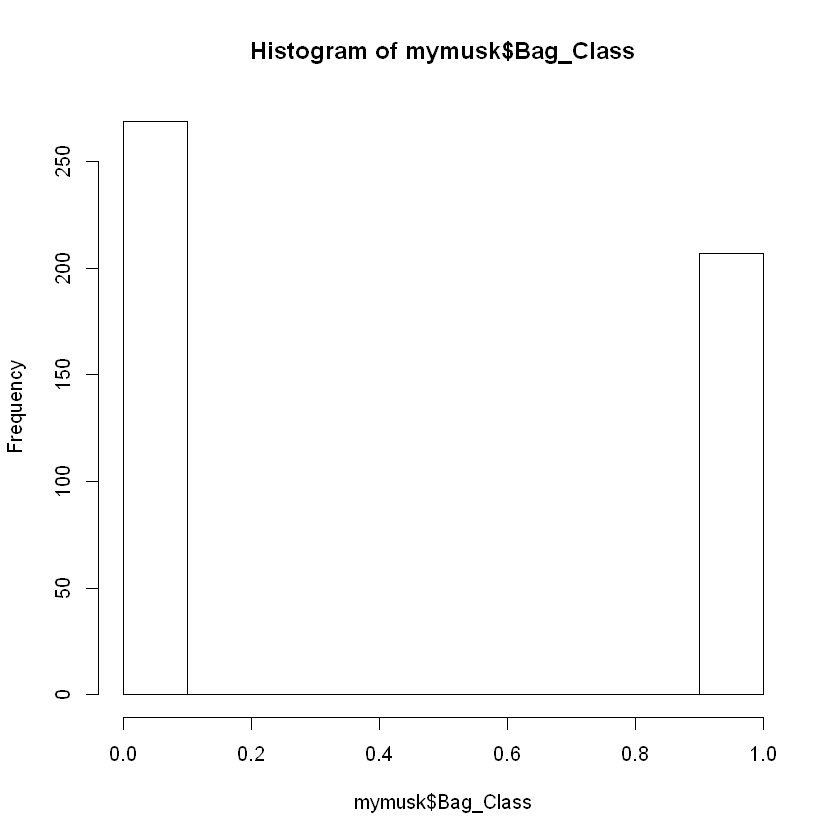

In [9]:
#no of class1 bags
hist(mymusk$Bag_Class)
#total
nrow(mymusk)
class1 = sum(mymusk$Bag_Class)
class1 
#class0= total-class1
class0=  nrow(mymusk) - class1 
class0
ratio = class1/nrow(mymusk)
ratio

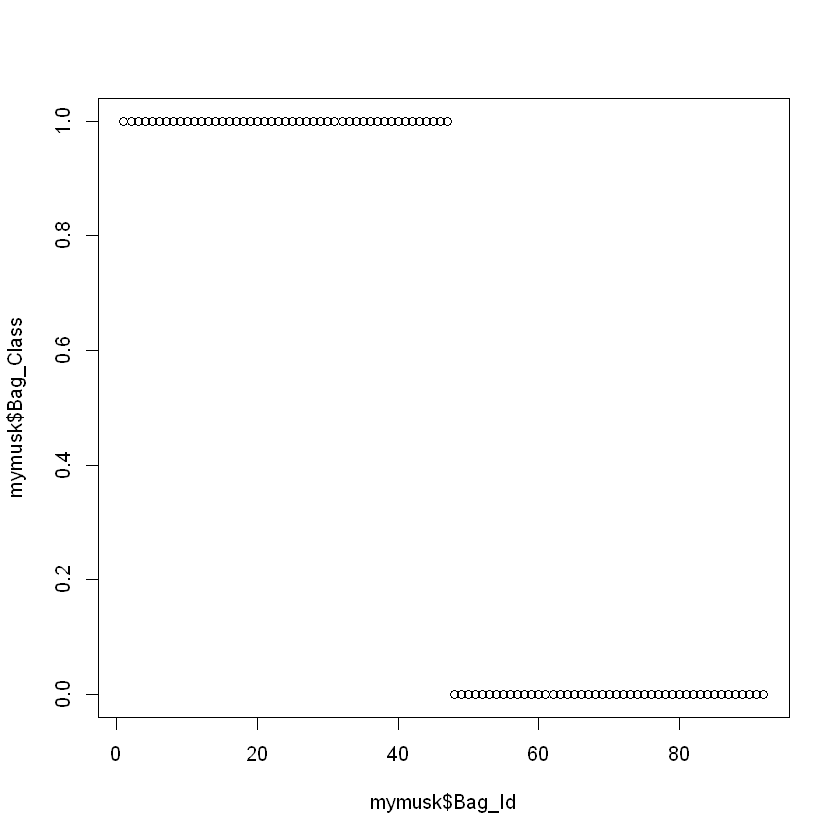

In [10]:
plot(mymusk$Bag_Id,mymusk$Bag_Class)

Roughly, the first half  is class1 and the rest is class0.

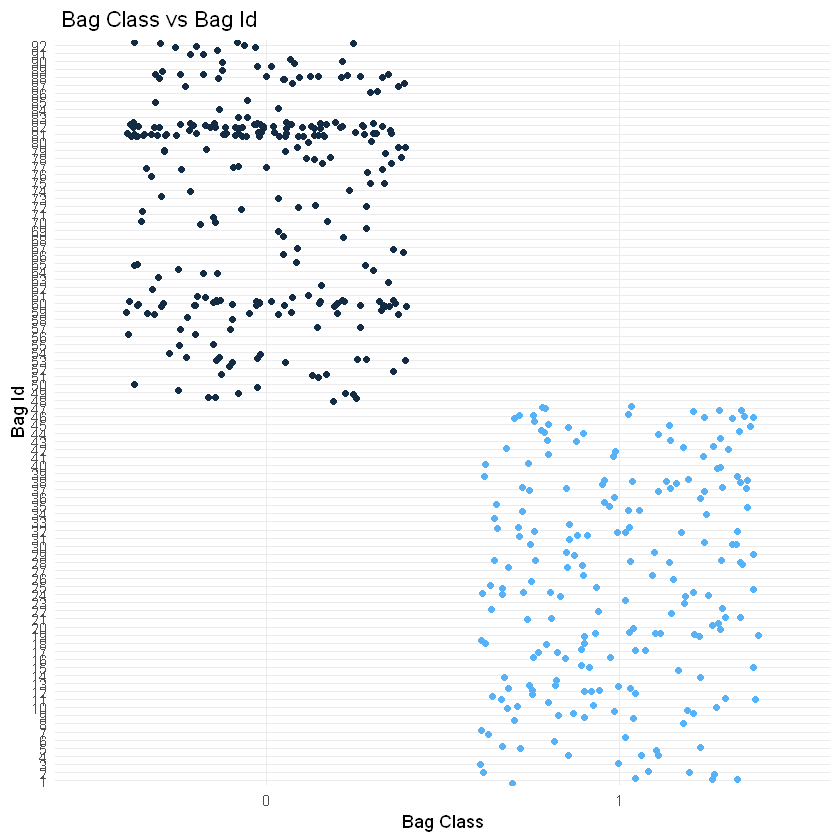

In [11]:
#plot 
 
ggplot(mymusk, aes(x = as.factor(Bag_Class), y = as.factor (Bag_Id), color = Bag_Class)) +
   geom_jitter() +
   theme_minimal() +
   theme(legend.position = "none") +
   labs(title = " Bag Class vs Bag Id",
        x = "Bag Class",
        y = "Bag Id")


The bag id instance vs the bag class is scattered above.

## Representations

 #### k-medoids will be used with euclidean distance (representation#1) and manhattan distance (representation#2)  for representing the problem.

From Wikipedia: The k-medoids problem, like the k-means problem (https://doi.org/10.1016/j.ins.2018.08.020), is a clustering problem. Both the k-means and k-medoids methods are partitional (they divide the dataset into groups) and aim to reduce the distance between points identified as belonging to a cluster and a point designated as its center. Unlike the k-means algorithm, k-medoids selects actual data points as cluster centers, allowing for more interpretability of cluster centers than k-means, which does not require the cluster center to be one of the input data points (it is the average between the points in the cluster).

Furthermore, unlike k-means which requires Euclidean distance for effective solutions, k-medoids can be utilized with any dissimilarity measure. K-medoids is more resilient to noise and outliers than k-means since it minimizes a sum of pairwise dissimilarities rather than a total of squared Euclidean distances. A cluster's medoid is defined as the object in the cluster with the least average dissimilarity to all other objects in the cluster, i.e., it is the cluster's most centrally situated point.  (https://en.wikipedia.org/wiki/K-medoids)

Since k-medoids allows different distance metrics; euclidean and manhattan distances are going to be used for 2 different representations.

The number of clusters needs to be determined and tuned accordingly.Where the biggest drop happens in the Within Sum of Squares (WSS) happens considered as the optimal number of clusters. This is shown graphically and also numerically. 


Since the representations will be distance based scaling of the features are needed.


In [12]:
 #  The features should be scaled 

sclmusk <- scale(mymusk[,-c(1,2)])
head(sclmusk)

#the first two columns hold the bag class and ID, no need to be scaled.

V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168
0.180723,-0.8815999,-0.4301752,-1.203764,-0.1637934,0.2255951,0.3718827,-1.263585,0.6545626,0.6772360,...,-0.2581806,1.455964,-0.1702653,-1.444906,-0.8638585,-1.0098004,-0.7868047,-0.1792746,0.5558014,-0.06854306
0.180723,-0.8023368,-0.9072433,-1.071341,-0.1637934,0.7037235,0.6158746,-2.345572,0.4780699,1.1188121,...,-0.2581806,-1.089633,1.3815278,-1.444906,-0.8753112,-0.9895037,-0.7868047,-0.1792746,0.5385627,-0.06854306
0.180723,-0.8023368,-0.9072433,-1.203764,-0.1637934,0.2255951,0.6158746,-2.226817,0.4780699,0.6634368,...,-0.2581806,1.467129,-0.1538442,-1.444906,-0.8638585,-1.0098004,-0.7868047,-0.1792746,0.5385627,-0.05008916
0.180723,-0.8815999,-0.4446318,-1.071341,-0.1637934,0.7037235,0.3718827,-1.355949,0.6545626,1.1188121,...,-0.2581806,-1.089633,1.3815278,-1.444906,-0.8753112,-1.0098004,-0.7868047,-0.1792746,0.5558014,-0.06854306
0.180723,-0.8815999,-0.3289789,-1.203764,-0.1637934,0.2147286,0.3812670,-1.250390,0.6545626,0.6634368,...,-0.2581806,1.467129,-0.1538442,1.162267,1.0372846,1.3040163,-0.8920954,0.2576990,0.6937105,-0.14235866
0.180723,-0.8023368,-0.9072433,-1.071341,-0.1637934,0.7037235,0.6158746,-2.345572,0.4780699,1.1326113,...,-0.2581806,-1.067303,1.3897384,1.162267,1.0258320,1.2837197,-0.9131535,0.1952742,0.6937105,-0.14235866


In [13]:
 #does not have the first two columns
euc_dist <- sclmusk %>% dist("euclidean") 
man_dist <- sclmusk %>% dist("manhattan") 


euc_dist<-as.data.table(as.matrix(euc_dist))
man_dist<-as.data.table(as.matrix(man_dist))
#sample for dist matrix
euc_dist[1:6, c(1,2,3,120,124,146)]

1,2,3,120,124,146
0.000000,9.747368,6.420542,17.09870,18.08329,12.153268
9.747368,0.000000,7.188194,16.63604,17.27497,9.706575
6.420542,7.188194,0.000000,16.49471,17.05425,11.555865
7.203768,6.344397,9.361300,17.32626,18.37635,10.305556
6.354020,11.634693,9.034539,18.18709,19.10382,10.405445
11.635096,6.350102,9.575952,17.74348,18.32997,7.352777


### Finding the Optimal Number of Clusters


For the applied method please see: https://www.statology.org/k-medoids-in-r/

#### Finding the Optimal Number of Clusters: Euclidean

Since, how many clusters is optimal is not known beforehand, a plot willl be created to decide on the number of clusters.
For this purpose, the fviz_nbclust() function  is used to create a plot of the number of clusters vs. the total within sum of squares:


In [14]:
graphE= fviz_nbclust(sclmusk, pam, method = "wss")
graphE$data

clusters,y
1,78850.00
2,57232.13
3,54107.40
4,45321.88
5,43768.01
6,41043.48
7,39820.95
8,38655.33
9,37258.15
10,35909.35


In order to find the optimal number of clusters (k); for each k value, Within Sum of Squares is represented above. The drop after k=4 becomes less compared to the ones before. The below graph visualize this situation and it can be seen that at k=4 there is an "elbow".


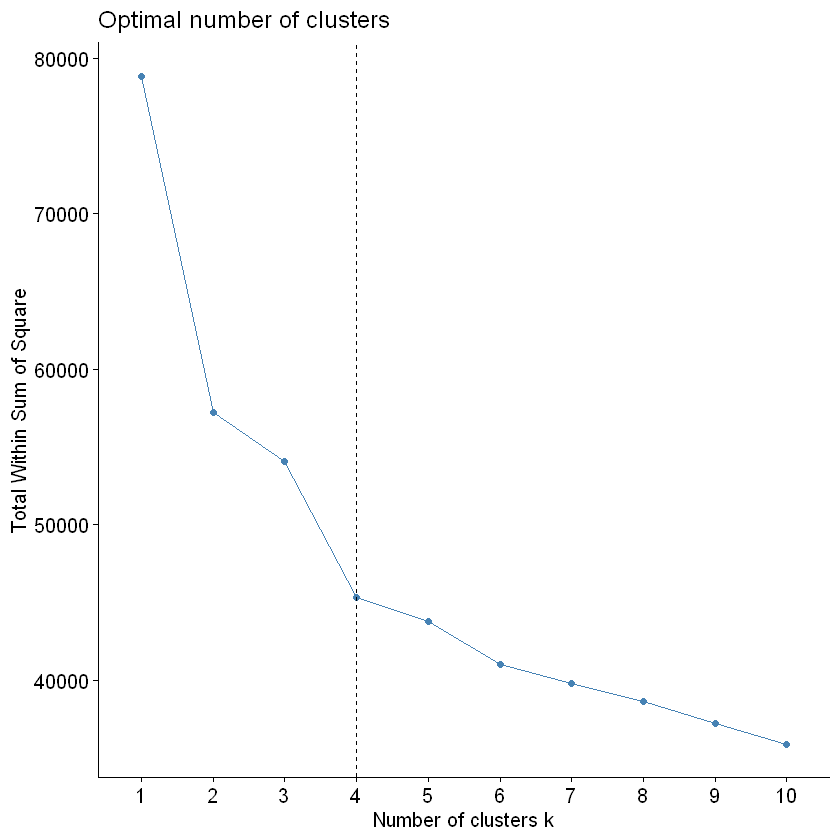

In [15]:
fviz_nbclust(sclmusk, pam, method = "wss") +
  geom_vline(xintercept = 4, linetype = 2)
  

"The total within sum of squares will typically always increase as we increase the number of clusters, so when we create this type of plot we look for an “elbow” where the sum of squares begins to “bend” or level off.
The point where the plot bends is typically the optimal number of clusters. Beyond this number, overfitting is likely to occur.") (https://www.statology.org/k-medoids-in-r/)

For this plot it appear that there is an elbow or “bend” at k = 4 clusters. The number of clusters is set to 4.

To perform k-medoids clustering in R, the pam() function is used, it stands for “partitioning around medians” 

In [16]:
#perform k-medoids clustering with k = 4 clusters
kmedoidsE <- pam(sclmusk, k = 4,metric = "euclidean")

#view results
kmedoidsE

Medoids:
      ID         V3         V4         V5         V6         V7         V8
[1,]  12  0.1254375  0.2847002  0.2637420 -1.2037636 -0.1637934  0.2690613
[2,]  90  1.0652899 -0.5871941  0.4805911  0.1601865 -0.1637934 -0.9479927
[3,]  69  0.2360084  0.1714671  0.8420063 -0.9389189 -0.1637934  0.8558552
[4,] 108 -1.0355565 -0.8249834 -0.9795263  0.2263977 -0.1637934 -0.2959994
             V9        V10        V11        V12        V13        V14
[1,]  0.4375728 -2.2664022  0.8206733  0.7048345 -1.7800698 -1.6143436
[2,]  0.6346433 -0.1552072  0.5611253 -0.6474922  0.5501335  0.3747149
[3,] -1.4205197  0.1350821 -1.4841128  0.6634368  0.3605955 -0.1557007
[4,]  0.5971060 -0.1156223  0.4469242 -0.7440870  0.5278350  0.2782757
            V15         V16         V17        V18        V19        V20
[1,] 0.06983363 -2.15451667 -2.32539471 -0.6091391  0.1237210 -0.4516571
[2,] 0.23581133 -0.01585169  0.04779095 -0.2333937  0.6940542 -0.2222949
[3,] 0.03965586  0.27250764  0.04779095  0

The clusters can be visualized on a scatterplot that displays the first two principal components on the axes using the fivz_cluster() function.


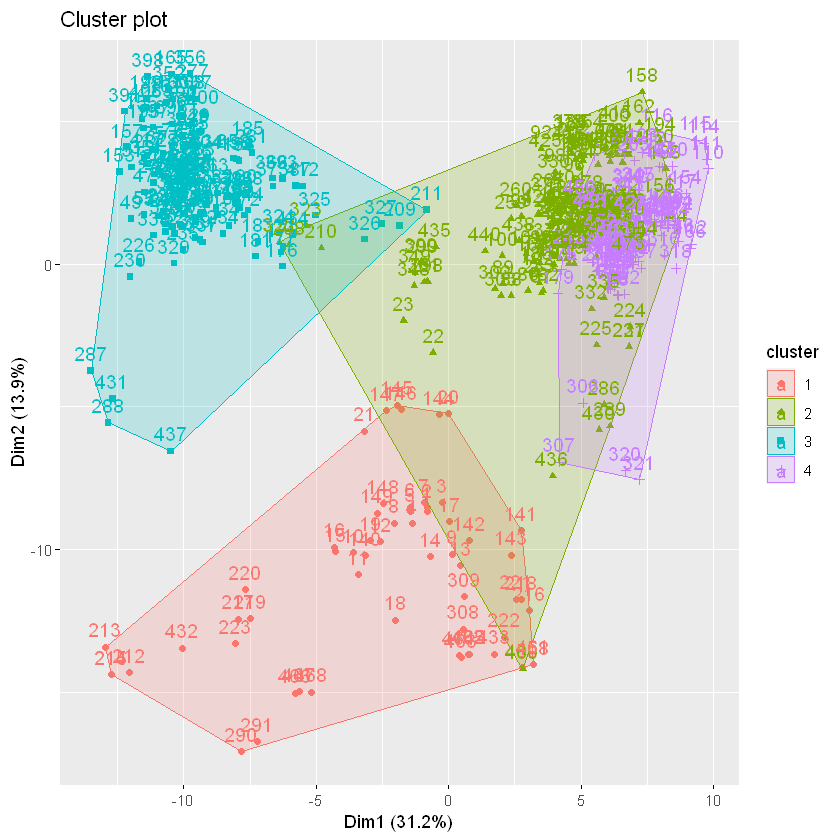

In [17]:
#We can visualize the clusters on a scatterplot that displays the first two principal components on the axes using the fivz_cluster() function:
#plot results of final k-medoids model
fviz_cluster(kmedoidsE, data = sclmusk)

#### Finding the Optimal Number of Clusters: Manhattan

The same procedure was performed to finf the optimal number of clusters when manhattan distance is used.

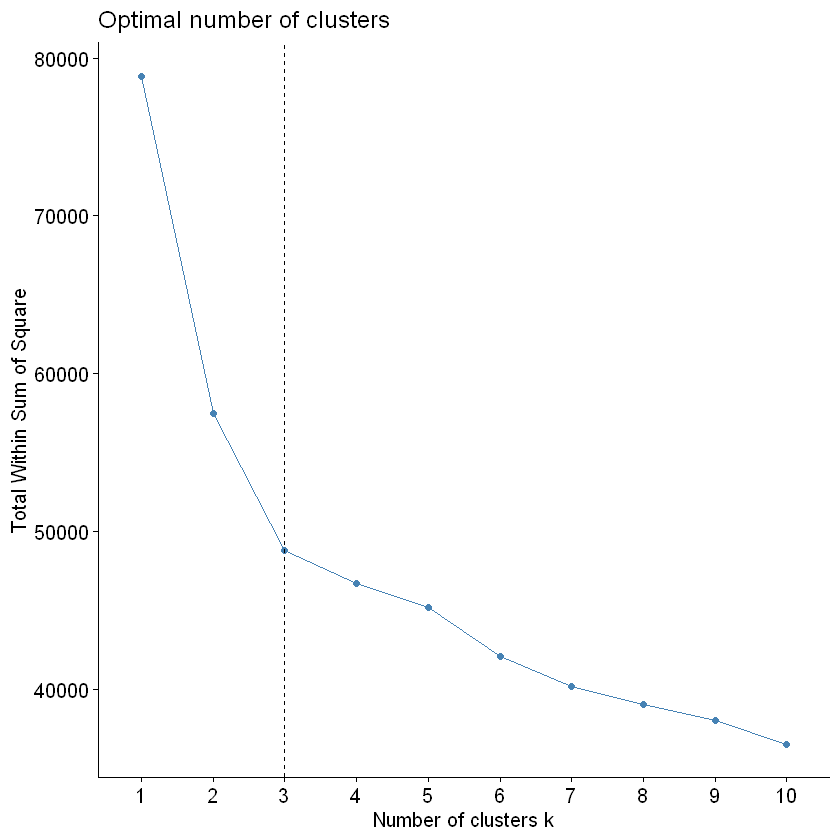

In [18]:
graphM=fviz_nbclust(sclmusk, pam, metric = "manhattan", method = "wss")+
  geom_vline(xintercept = 3, linetype = 2)
graphM


In [19]:
graphM$data


clusters,y
1,78850.00
2,57477.77
3,48814.96
4,46682.79
5,45159.62
6,42036.02
7,40187.09
8,39032.47
9,37989.93
10,36514.54


Now, k= 3 found to the optimal number of clusters for this metric.

In [20]:
kmedoidsM <- pam(sclmusk, k = 3,metric = "manhattan")


In [21]:
kmedoidsM


Medoids:
     ID          V3         V4         V5         V6         V7         V8
[1,] 12  0.12543753  0.2847002  0.2637420 -1.2037636 -0.1637934  0.2690613
[2,] 60  0.78886272 -0.7910135 -0.6614809  0.1866710 -0.1637934 -0.8827933
[3,] 58 -0.04041876  0.1148506  0.8275497 -0.7800121 -0.1637934  0.5081255
             V9         V10        V11        V12       V13         V14
[1,]  0.4375728 -2.26640223  0.8206733 0.70483451 -1.780070 -1.61434360
[2,]  0.5971060  0.01632739  0.5507434 0.05626964  0.527835  0.53142862
[3,] -1.4017511  0.75524565 -1.3283840 0.62203899 -0.219168 -0.08337128
            V15        V16        V17        V18        V19        V20
[1,] 0.06983363 -2.1545167 -2.3253947 -0.6091391  0.1237210 -0.4516571
[2,] 0.70356666 -0.1480164  0.1395716 -0.4212664  0.8495996  0.2670109
[3,] 0.19054468  0.3205675  0.2969099 -0.3899543 -1.5181471  0.7716076
            V21        V22         V23        V24         V25        V26
[1,] -2.2455061 -2.0181973  0.28544609  0.4063

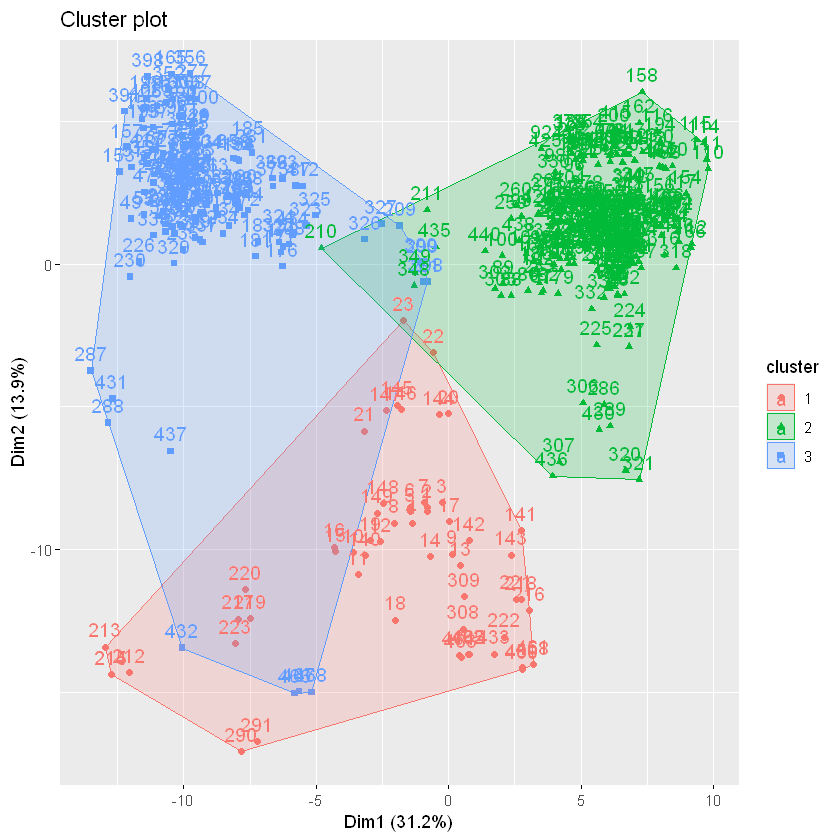

In [22]:
fviz_cluster(kmedoidsM, data = sclmusk)

The 3 clusters can be visualized on a scatterplot that displays the first two principal components on the axes.

####  The best set of parameter combination for the proposed representations are given as follows:
####  k = 4 for Euclidean and 
#### k = 3 for Manhattan distance found to be optimal.
#### Now, the final reprsentations can be formed.

### Representation#1: 4-Medoids Euclidean

In [23]:
#euclidean
# represent the data so that the features show the average distances to the center of the clusters

kmedoidsE$id.med



[1]  12  90  69 108

In [24]:
mdis1 = c() #empty dist 
#k= 4  #4 clusters for euclidean

#generate 4 features with the distance info

mdis1<-cbind(euc_dist[,get(as.character(as.numeric(kmedoidsE$id.med[1])))],euc_dist[,get(as.character(as.numeric(kmedoidsE$id.med[2])))],euc_dist[,get(as.character(as.numeric(kmedoidsE$id.med[3])))],euc_dist[,get(as.character(as.numeric(kmedoidsE$id.med[4])))])

#mdis1

mdis1 <- mdis1 %>% as.data.table(mdis1)
setnames(mdis1, old=colnames(mdis1), new=c("Cls1","Cls2","Cls3","Cls4"))
bag1 <- cbind(mymusk[,1:2], mdis1) %>% as.data.table()
bagmean1 <- bag1 %>% aggregate(., list(bag1$Bag_Id), mean) %>% select(-Group.1) 

In [25]:
head(bagmean1)
tail(bagmean1)

Bag_Class,Bag_Id,Cls1,Cls2,Cls3,Cls4
1,1,8.171827,16.66629,18.87771,16.39061
1,2,9.674264,16.13365,18.58626,17.52873
1,3,9.719209,16.44523,18.72514,18.22199
1,4,5.867434,16.74637,19.05427,17.46591
1,5,15.401786,20.10263,21.89998,21.81525
1,6,10.078564,17.21602,19.83173,18.81168


,Bag_Class,Bag_Id,Cls1,Cls2,Cls3,Cls4
87,0,87,24.50219,20.55036,20.23286,22.899532
88,0,88,19.00961,12.47712,20.14289,9.099134
89,0,89,18.70702,18.82363,25.59508,20.699871
90,0,90,16.07207,18.47011,23.71070,20.357047
91,0,91,24.28005,26.63296,24.64077,25.926869
92,0,92,19.30512,14.50194,15.21473,16.515298


Above, we get the representation#1.

### Representation#2: 3-Medoids Manhattan

In [26]:
#manhattan

# represent the data so that the features show the average distances to the center of the clusters

kmedoidsM$id.med


[1] 12 60 58

In [27]:
#k= 3  #3 clusters for manhattan
#generate 3 feautures with the distance info
mdis2 = c() #empty dist 

mdis2<-cbind(man_dist[,get(as.character(as.numeric(kmedoidsM$id.med[1])))],euc_dist[,get(as.character(as.numeric(kmedoidsM$id.med[2])))],euc_dist[,get(as.character(as.numeric(kmedoidsM$id.med[3])))])


#mdis2

mdis2 <- mdis2 %>% as.data.table(mdis2)
setnames(mdis2, old=colnames(mdis2), new=c("Cls1","Cls2","Cls3"))
bag2 <- cbind(mymusk[,1:2], mdis2) %>% as.data.table()
bagmean2 <- bag2 %>% aggregate(., list(bag2$Bag_Id), mean) %>% select(-Group.1) 
head(bagmean2)
tail(bagmean2)


Bag_Class,Bag_Id,Cls1,Cls2,Cls3
1,1,65.33971,14.97200,17.06730
1,2,79.18382,16.15621,17.67426
1,3,83.22995,17.08330,18.79550
1,4,47.90798,16.23029,17.30187
1,5,102.21577,20.74279,22.32305
1,6,80.56845,17.81178,19.10967


,Bag_Class,Bag_Id,Cls1,Cls2,Cls3
87,0,87,228.2973,21.90957,21.11427
88,0,88,192.9529,10.44356,19.23339
89,0,89,167.3083,20.93985,24.52836
90,0,90,145.1546,20.46500,22.55616
91,0,91,257.4561,26.62093,24.51451
92,0,92,202.6035,15.50665,15.39257


Above, we get the representation#2.

#### 3 classifiers were evaluated: Decision trees, Random Forest and Penalized Logistic Regression. 

#### Accuracy was used to find the optimal model while tuning for each model's parameters.

#### The models with the best set of parameters are presented for each case.

## Classifier#1: Decision tree 

In [28]:
#transform 0-1 to factors, for usage in classification in decision trees (it gave errors when 0-1)
bagmean1$Bag_Class = ifelse(bagmean1$Bag_Class == 1, "onebag", "zerobag")
head(bagmean1)
bagmean2$Bag_Class = ifelse(bagmean2$Bag_Class == 1, "onebag", "zerobag")
head(bagmean2)

Bag_Class,Bag_Id,Cls1,Cls2,Cls3,Cls4
onebag,1,8.171827,16.66629,18.87771,16.39061
onebag,2,9.674264,16.13365,18.58626,17.52873
onebag,3,9.719209,16.44523,18.72514,18.22199
onebag,4,5.867434,16.74637,19.05427,17.46591
onebag,5,15.401786,20.10263,21.89998,21.81525
onebag,6,10.078564,17.21602,19.83173,18.81168


Bag_Class,Bag_Id,Cls1,Cls2,Cls3
onebag,1,65.33971,14.97200,17.06730
onebag,2,79.18382,16.15621,17.67426
onebag,3,83.22995,17.08330,18.79550
onebag,4,47.90798,16.23029,17.30187
onebag,5,102.21577,20.74279,22.32305
onebag,6,80.56845,17.81178,19.10967


These, above are representation#1 and #2 respectively.

### Classifier #1.1: Decision tree with Representation#1 (Euclidean dist.)

In [29]:
library("caret")
set.seed(123)
#with Euclidean rep
Euc_grid <- expand.grid(cp=c(0.005,0.007,0.01,0.03,0.05,0.1))
#it would not take minbucket as a grid value, I tried manually
Traincontrol_Euc <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE)

Results when cp=c(0.005,0.007,0.01,0.03,0.05,0.1) and minbucket = 5 are below.

In [30]:
#the decision tree with euclidean rep.
#Minbucket = 1 is also tried which will result in a deep tree and probably in overfitting. 
#therefore mincbucket = 5 and higher were tried.
set.seed(123)
tree_Euc5 <- train(x=as.matrix(bagmean1[,3:6],with = F ),y=as.matrix(bagmean1$Bag_Class,with = F), method ="rpart", tuneGrid = Euc_grid ,trControl=Traincontrol_Euc, control = rpart.control(minbucket=c(5)))
tree_Euc5

CART 

92 samples
 4 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 82, 82, 83, 84, 83, 83, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.005  0.6930556  0.3818105
  0.007  0.6930556  0.3818105
  0.010  0.6930556  0.3818105
  0.030  0.7141667  0.4292294
  0.050  0.7566667  0.5142294
  0.100  0.6958333  0.3888971

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.05.

Results when cp=c(0.005,0.007,0.01,0.03,0.05,0.1) and minbucket = 7 are below.

In [31]:
set.seed(123)
tree_Euc7 <- train(x=as.matrix(bagmean1[,3:6],with = F ),y=as.matrix(bagmean1$Bag_Class,with = F), method ="rpart", tuneGrid = Euc_grid ,trControl=Traincontrol_Euc, control = rpart.control(minbucket=c(7)))
tree_Euc7

CART 

92 samples
 4 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 82, 82, 83, 84, 83, 83, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.005  0.6922222  0.3843621
  0.007  0.6922222  0.3843621
  0.010  0.6922222  0.3843621
  0.030  0.6722222  0.3486478
  0.050  0.7058333  0.4110158
  0.100  0.7058333  0.4088971

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.1.

Results when cp=c(0.005,0.007,0.01,0.03,0.05,0.1) and minbucket = 10 are below.

In [32]:
set.seed(123)
tree_Euc10 <- train(x=as.matrix(bagmean1[,3:6],with = F ),y=as.matrix(bagmean1$Bag_Class,with = F), method ="rpart", tuneGrid = Euc_grid ,trControl=Traincontrol_Euc, control = rpart.control(minbucket=c(10)))
tree_Euc10

CART 

92 samples
 4 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 82, 82, 83, 84, 83, 83, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.005  0.6400000  0.2707084
  0.007  0.6400000  0.2707084
  0.010  0.6400000  0.2707084
  0.030  0.6733333  0.3438971
  0.050  0.6858333  0.3688971
  0.100  0.7169444  0.4319740

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.1.

#### Resulting model
cp=c(0.005,0.007,0.01,0.03,0.05,0.1) and minbucket = c(5,7, 10) were tried. 

Accuracy was used to select the optimal model using the largest value. (0.7566667)

The final value used for the model was cp = 0.05 and minbucket = 5. 

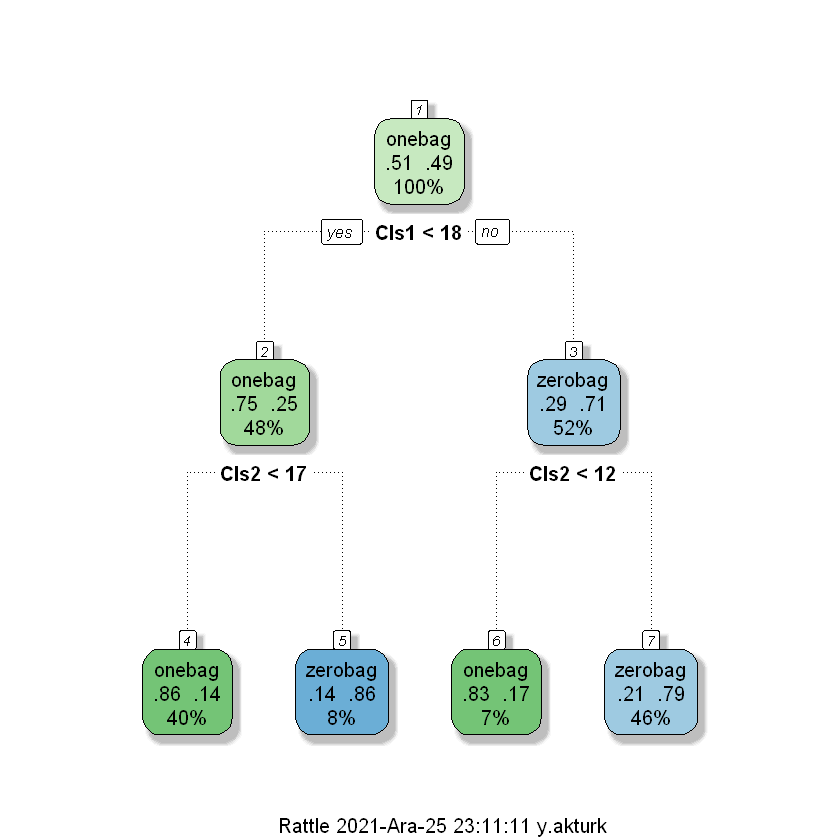

In [33]:
##final tree Euc

mybag1=as.data.table(bagmean1)
my_tree_Euc <- rpart(Bag_Class~Cls1+Cls2+Cls3+Cls4 , mybag1, minbucket = c(5), cp = 0.05)

fancyRpartPlot(my_tree_Euc)

This tree was used to predict the training data and accuracy is presented.

In [34]:
#now we have onebag-zerobag representation for decisişn tree and RF
#tranform and count for log reg
#0-1 representation is going to be used for log reg.
logbag1= bagmean1
logbag1$Bag_Class=ifelse(logbag1$Bag_Class== "onebag",1,0)
logbag2= bagmean2
logbag2$Bag_Class=ifelse(logbag2$Bag_Class== "onebag",1,0)

k1 =  sum(logbag1$Bag_Class)
tot = length(logbag1$Bag_Class)
k0 = tot - k1
k1
k0
kratio= k1/tot
kratio 
#classratio is 0.51 not imbalanced, however this ratio can still be used for prediction

#use ratio since the set is slightly imbalanced
predicted_prob1 <-  predict(my_tree_Euc,bagmean1,type= "prob")
predicted_class1  <- ifelse(predicted_prob1 [,1] > kratio, "onebag", "zerobag")
confusion_mat1 <- addmargins(table(bagmean1$Bag_Class, predicted_class1 ))
confusion_mat1
#training accuracy
trainerr1 =  1- (sum(diag((confusion_mat1[1:2,1:2]))) /  confusion_mat1[3,3])
trainerr1
acc_train1= 1- trainerr1
acc_train1



[1] 47

[1] 45

[1] 0.5108696

,onebag,zerobag,Sum
onebag,37,10,47
zerobag,6,39,45
Sum,43,49,92


[1] 0.173913

[1] 0.826087

Accuracy is presented above.

### Classifier #1.2: Decision tree with Representation#2 (Manhattan dist.)

In [35]:
#with Manhattan rep
set.seed(123)
Man_grid <- expand.grid(cp=c(0.005,0.007,0.01,0.03,0.05,0.1))
#it would not take minbucket as a grid value, I tried manually
Traincontrol_Man <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE)

In [36]:
#the decision tree with manhattan rep
set.seed(123)

tree_Man1 <- train(x=as.matrix(bagmean2[,3:5],with = F ),y=as.matrix(bagmean2$Bag_Class,with = F), method ="rpart", tuneGrid = Man_grid ,trControl=Traincontrol_Man, control = rpart.control(minbucket=c(1)))
tree_Man1
tree_Man5 <- train(x=as.matrix(bagmean2[,3:5],with = F ),y=as.matrix(bagmean2$Bag_Class,with = F), method ="rpart", tuneGrid = Man_grid ,trControl=Traincontrol_Man, control = rpart.control(minbucket=c(5)))
tree_Man5
tree_Man7 <- train(x=as.matrix(bagmean2[,3:5],with = F ),y=as.matrix(bagmean2$Bag_Class,with = F), method ="rpart", tuneGrid = Man_grid ,trControl=Traincontrol_Man, control = rpart.control(minbucket=c(7)))
tree_Man7
tree_Man10 <- train(x=as.matrix(bagmean2[,3:5],with = F ),y=as.matrix(bagmean2$Bag_Class,with = F), method ="rpart", tuneGrid = Man_grid ,trControl=Traincontrol_Man, control = rpart.control(minbucket=c(10)))
tree_Man10


CART 

92 samples
 3 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 82, 82, 83, 84, 83, 83, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.005  0.7355556  0.4754945
  0.007  0.7355556  0.4754945
  0.010  0.7155556  0.4354945
  0.030  0.7380556  0.4729121
  0.050  0.6755556  0.3478232
  0.100  0.6200000  0.2447213

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.03.

CART 

92 samples
 3 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 83, 84, 82, 83, 82, 83, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.005  0.6902778  0.3789208
  0.007  0.6902778  0.3789208
  0.010  0.6902778  0.3789208
  0.030  0.7438889  0.4893380
  0.050  0.7638889  0.5269499
  0.100  0.6161111  0.2096530

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.05.

CART 

92 samples
 3 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 82, 83, 82, 83, 84, 83, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.005  0.7294444  0.4644148
  0.007  0.7294444  0.4644148
  0.010  0.7294444  0.4644148
  0.030  0.7283333  0.4646587
  0.050  0.7186111  0.4446587
  0.100  0.6936111  0.3946587

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.

CART 

92 samples
 3 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 82, 84, 83, 83, 83, 82, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.005  0.6800000  0.3655749
  0.007  0.6800000  0.3655749
  0.010  0.6800000  0.3655749
  0.030  0.6800000  0.3589208
  0.050  0.6563889  0.3130671
  0.100  0.6288889  0.2656414

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.03.

#### Resulting model
cp=c(0.005,0.007,0.01,0.03,0.05,0.1) and minbucket = c(1,5,7 10) were tried. 

Accuracy = 0.7638889  was used to select the optimal model using the largest value. The final value used for the model was cp = 0.05 and minbucket = 5.

Therefore mincbucket = 5 and cp = 0.05 was selected.

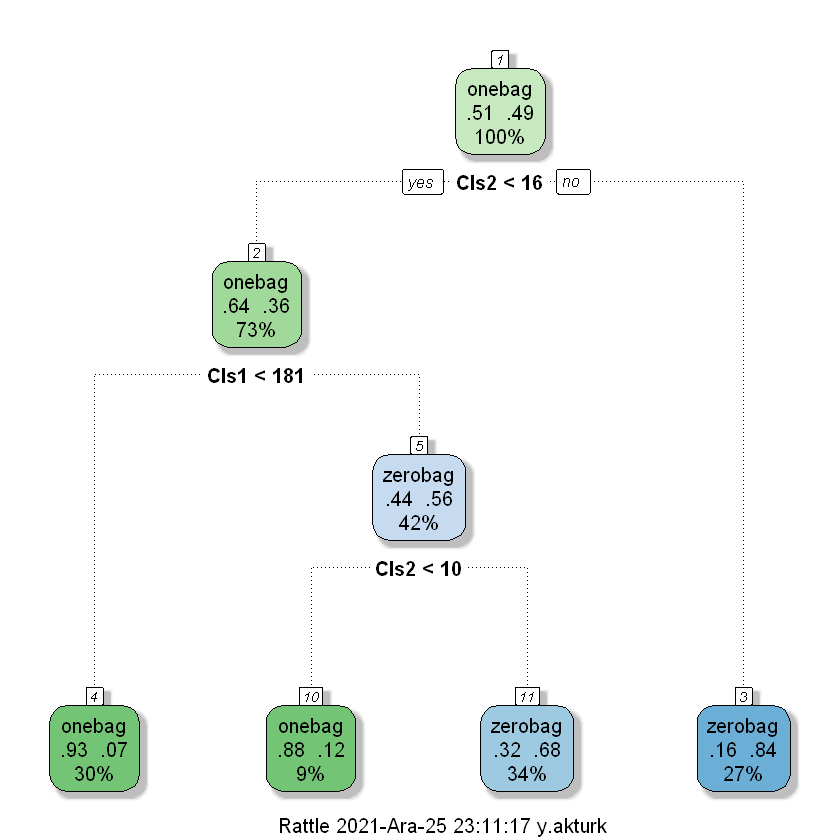

In [37]:
##final tree manhattan

mybag2=as.data.table(bagmean2)
my_tree_Man <- rpart(Bag_Class~Cls1+Cls2+Cls3, mybag2, minbucket = c(5), cp = 0.05)

fancyRpartPlot(my_tree_Man)


This tree was used to predict the training data and accuracy is presented below.

In [38]:
k1m =  sum(logbag2$Bag_Class)
totm = length(logbag2$Bag_Class)
k0m = totm - k1m
k1m
k0m
kratiom= k1m/totm
kratiom
#classratio is 0.51 not imbalanced, however this ratio can still be used for prediction

predicted_prob2<-  predict(my_tree_Man, bagmean2,type= "prob")
predicted_class2 <- ifelse(predicted_prob2[,1] > kratiom, "onebag", "zerobag")
confusion_mat2 <- addmargins(table(bagmean2$Bag_Class, predicted_class2 ))
confusion_mat2
#training accuracy
trainerr2 =  1- (sum(diag((confusion_mat2[1:2,1:2]))) /  confusion_mat2[3,3])
trainerr2
acc_train2= 1- trainerr2
acc_train2

[1] 47

[1] 45

[1] 0.5108696

,onebag,zerobag,Sum
onebag,33,14,47
zerobag,3,42,45
Sum,36,56,92


[1] 0.1847826

[1] 0.8152174

Accuracy is presented above.

## Classifier#2: Random forest

### Classifier#2.1: Random forest with Representation#1 (Euclidean dist.)

In [39]:
set.seed(123)

#euclidean

Euc_grid_RF <- expand.grid(mtry = c(1:4) ,min.node.size=5, splitrule = "gini")
Traincontrol_Euc_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE)


In [40]:
RF_euc <- train(x=as.matrix(bagmean1[,3:6],with = F ),y=as.matrix(bagmean1$Bag_Class), method="ranger", tuneGrid= Euc_grid_RF, trControl= Traincontrol_Euc_RF)
RF_euc

Random Forest 

92 samples
 4 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 82, 82, 83, 84, 83, 83, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  1     0.7455556  0.4879362
  2     0.7555556  0.5079644
  3     0.7244444  0.4460131
  4     0.7455556  0.4868668

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = gini
 and min.node.size = 5.

#### Resulting model
mtry = c(1:4) were tried.

Accuracy = 0.7555556  was used to select the optimal model using the largest value. 
The final values used for the model were mtry = 2, splitrule = gini and min.node.size = 5.

Therefore mtry = 2 was selected for the model.

This RF model was used to predict the OOB training data and accuracy is presented.

In [41]:
#print
my_RF_euc =randomForest(bagmean1[,-c(1,2)],as.factor(bagmean1$Bag_Class),mtyr=2, min.node.size = 5, splitrule = "gini")
print(my_RF_euc)


Call:
 randomForest(x = bagmean1[, -c(1, 2)], y = as.factor(bagmean1$Bag_Class),      mtyr = 2, min.node.size = 5, splitrule = "gini") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 27.17%
Confusion matrix:
        onebag zerobag class.error
onebag      34      13   0.2765957
zerobag     12      33   0.2666667


In [42]:
my_RF_euc$confusion

,onebag,zerobag,class.error
onebag,34,13,0.2765957
zerobag,12,33,0.2666667


In [43]:
err =  1- (sum(diag((my_RF_euc$confusion[1:2,1:2]))) /  sum((my_RF_euc$confusion[1:2,1:2])))
err

acc= 1- err
acc


[1] 0.2717391

[1] 0.7282609

### Classifier#2.2: Random forest with Representation#2 (Manhattan dist.)

In [44]:
#manhattan
set.seed(123)
Man_grid_RF <- expand.grid(mtry = c(1:3) ,min.node.size=5, splitrule = "gini")
Traincontrol_Man_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE)
RF_man <- train(x=as.matrix(bagmean2[,3:5],with = F ),y=as.matrix(bagmean2$Bag_Class), method="ranger", tuneGrid= Man_grid_RF, trControl= Traincontrol_Man_RF)
RF_man

Random Forest 

92 samples
 3 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 82, 82, 83, 84, 83, 83, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  1     0.7419444  0.4785277
  2     0.7308333  0.4576218
  3     0.7183333  0.4326218

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 1, splitrule = gini
 and min.node.size = 5.

#### Resulting model
mtry = c(1:3) were tried.

Accuracy = 0.7419444  was used to select the optimal model using the largest value. The final values used for the model were mtry = 1, splitrule = gini and min.node.size = 5.

Therefore mtry = 1 was selected for the model.

In [45]:
my_RF_man =randomForest(bagmean2[,-c(1,2)],as.factor(bagmean2$Bag_Class),mtyr=1, min.node.size = 5, splitrule = "gini")
print(my_RF_man)
my_RF_man$confusion


Call:
 randomForest(x = bagmean2[, -c(1, 2)], y = as.factor(bagmean2$Bag_Class),      mtyr = 1, min.node.size = 5, splitrule = "gini") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 26.09%
Confusion matrix:
        onebag zerobag class.error
onebag      34      13   0.2765957
zerobag     11      34   0.2444444


,onebag,zerobag,class.error
onebag,34,13,0.2765957
zerobag,11,34,0.2444444


This RF model was used to predict the OOB training data and accuracy is presented.

In [46]:
errm =  1- (sum(diag((my_RF_man$confusion[1:2,1:2]))) /  sum((my_RF_man$confusion[1:2,1:2])))
errm

accm= 1- errm
accm

[1] 0.2608696

[1] 0.7391304

## Classifier#3: Logistic Regression

Additionally, logistic regressions model for both representations were built for comparision.

### Classifier#3.1: Logistic Regression with Representation#1 (Euclidean dist.)

Several lambda values are tried to find optimal penalty for Lasso penalized model

In [47]:
#log reg with caret

set.seed(123)
log_euc_grid <- expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.1, by = 0.0001))
Traincontrol_euc_log <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE)
log_euclid <- train(x=as.matrix(bagmean1[,3:6],with = F ),y=as.matrix(bagmean1$Bag_Class), method="glmnet",family='binomial',type.measure = "deviance",tuneGrid= log_euc_grid , trControl= Traincontrol_euc_log )
log_euclid

glmnet 

92 samples
 4 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 82, 82, 83, 84, 83, 83, ... 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0.0010  0.7805556  0.5621697
  0.0011  0.7805556  0.5621697
  0.0012  0.7805556  0.5621697
  0.0013  0.7805556  0.5621697
  0.0014  0.7805556  0.5621697
  0.0015  0.7805556  0.5621697
  0.0016  0.7805556  0.5621697
  0.0017  0.7805556  0.5621697
  0.0018  0.7805556  0.5621697
  0.0019  0.7805556  0.5621697
  0.0020  0.7805556  0.5621697
  0.0021  0.7805556  0.5621697
  0.0022  0.7805556  0.5621697
  0.0023  0.7805556  0.5621697
  0.0024  0.7805556  0.5621697
  0.0025  0.7805556  0.5621697
  0.0026  0.7805556  0.5621697
  0.0027  0.7805556  0.5621697
  0.0028  0.7805556  0.5621697
  0.0029  0.7805556  0.5621697
  0.0030  0.7805556  0.5621697
  0.0031  0.7916667  0.5830756
  0.0032  0.7916667  0.5830756
  0.0033  0.7916667  0.5830756
 

Accuracy was used to select the optimal model using the largest value. (Max Accuracy =  0.8027778)
The final values used for the model were alpha = 1 and lambda = 0.0246.

In [48]:
#use this distance info  to build a logistic regression model with penalty

logbag1= bagmean1
logbag1$Bag_Class=ifelse(logbag1$Bag_Class== "onebag",1,0)
logbag2= bagmean2
logbag2$Bag_Class=ifelse(logbag2$Bag_Class== "onebag",1,0)


Models can be build as follows and the prediction can be made with the minimizer lambda:

In [49]:
#euclidean model
set.seed(123)
 #use deviance as metric, since balanced, the results should be similar (deviance~~accuracy)
cvfitds=cv.glmnet(as.matrix(logbag1[,3:6],with = F ),logbag1$Bag_Class,family='binomial',nfolds=10, type.measure = "deviance")

 #use accuracy as metric
cvfitdsa=cv.glmnet(as.matrix(logbag1[,3:6],with = F ),logbag1$Bag_Class,family='binomial',nfolds=10, type.measure = "class")



In [50]:
cvfitdsa


Call:  cv.glmnet(x = as.matrix(logbag1[, 3:6], with = F), y = logbag1$Bag_Class,      type.measure = "class", nfolds = 10, family = "binomial") 

Measure: Misclassification Error 

     Lambda Index Measure      SE Nonzero
min 0.02291    25  0.2174 0.04376       4
1se 0.09249    10  0.2609 0.05634       3

We get the same accuracy and almost the same lambda value with tuning manually the logistric regresion model and letting glmnet optimize the lambda value. Both lambda values (got by caret tuning manually, and, the one cv.glmnet obtained) have the same accuracy. Since, the same accuracy ( Accuracy = 0.8027778) is achieved by both, we can use the below model with lambda.min.

In [51]:
#predict on training data (deviance)
prob <-  predict(cvfitds,as.matrix(logbag1[,3:6],with = F ),type='response', s="lambda.min")
pred <- as.integer(prob > kratio)
euc_confusion_mat <- addmargins(table(logbag1$Bag_Class, pred ))
euc_confusion_mat

euc_err =  1- (sum(diag((euc_confusion_mat[1:2,1:2]))) /  euc_confusion_mat[3,3])
euc_err

euc_acc= 1- euc_err
euc_acc

,0,1,Sum
0,35,10,45
1,8,39,47
Sum,43,49,92


[1] 0.1956522

[1] 0.8043478

Since the data is not imbalanced, using metric "deviance" and metric of "accuracy" does not cause an important difference while evaluating the models

In [52]:
#predict on training data (accuracy)
proba <-  predict(cvfitdsa,as.matrix(logbag1[,3:6],with = F ),type='response', s="lambda.min")
preda <- as.integer(proba > kratio)
euc_confusion_mata <- addmargins(table(logbag1$Bag_Class, preda ))
euc_confusion_mata

euc_erra =  1- (sum(diag((euc_confusion_mata[1:2,1:2]))) /  euc_confusion_mata[3,3])
euc_erra

euc_acca= 1- euc_erra
euc_acca


,0,1,Sum
0,35,10,45
1,8,39,47
Sum,43,49,92


[1] 0.1956522

[1] 0.8043478

Above the accuracy is presented.

### Classifier#3.2: Logistic Regression with Representation#2 (Manhattan dist.)

In [53]:
set.seed(123)
log_man_grid <- expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.1, by = 0.0001))
Traincontrol_Man_log <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE)
log_manha <- train(x=as.matrix(bagmean2[,3:5],with = F ),y=as.matrix(bagmean2$Bag_Class), method="glmnet",family='binomial',type.measure = "deviance", tuneGrid= log_man_grid , trControl= Traincontrol_Man_log )
log_manha


glmnet 

92 samples
 3 predictor
 2 classes: 'onebag', 'zerobag' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 82, 82, 83, 84, 83, 83, ... 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0.0010  0.7716667  0.5432645
  0.0011  0.7716667  0.5432645
  0.0012  0.7716667  0.5432645
  0.0013  0.7716667  0.5432645
  0.0014  0.7716667  0.5432645
  0.0015  0.7716667  0.5432645
  0.0016  0.7716667  0.5432645
  0.0017  0.7716667  0.5432645
  0.0018  0.7716667  0.5432645
  0.0019  0.7716667  0.5432645
  0.0020  0.7716667  0.5432645
  0.0021  0.7716667  0.5432645
  0.0022  0.7716667  0.5432645
  0.0023  0.7716667  0.5432645
  0.0024  0.7716667  0.5432645
  0.0025  0.7716667  0.5432645
  0.0026  0.7716667  0.5432645
  0.0027  0.7716667  0.5432645
  0.0028  0.7716667  0.5432645
  0.0029  0.7716667  0.5432645
  0.0030  0.7716667  0.5432645
  0.0031  0.7716667  0.5432645
  0.0032  0.7716667  0.5432645
  0.0033  0.7716667  0.5432645
 

Accuracy was used to select the optimal model using the largest value. (Accuracy = 0.7827778)
The final values used for the model were alpha = 1 and lambda = 0.0539.

Models can be build as follows and the prediction can be made with the minimizer lambda:

In [54]:
#manhattan
set.seed(123)
#metric=deviance
cvfitdsman=cv.glmnet(as.matrix(logbag2[,3:5],with = F ),logbag2$Bag_Class,family='binomial',nfolds=10, type.measure = "deviance")
#metric=accurACY
cvfitdsmana=cv.glmnet(as.matrix(logbag2[,3:5],with = F ),logbag2$Bag_Class,family='binomial',nfolds=10, type.measure = "class")
cvfitdsmana


Call:  cv.glmnet(x = as.matrix(logbag2[, 3:5], with = F), y = logbag2$Bag_Class,      type.measure = "class", nfolds = 10, family = "binomial") 

Measure: Misclassification Error 

     Lambda Index Measure      SE Nonzero
min 0.00727    38  0.2174 0.04629       3
1se 0.11855     8  0.2500 0.06047       2

We get the same accuracy and almost the same result with tuning manually the logistric regresion model and letting glmnet optimaze the lambda value. Both lambda values (got by caret tuning manually: 0.0539 , and, the one cv.glmnet obtained) have the same accuracy. Since, the same accuracy ( Accuracy = 0.7827778) is achieved by we can use the model with lambda.min.

In [55]:
#predict on training data(metric=deviance)
probman <-  predict(cvfitdsman,as.matrix(logbag2[,3:5],with = F ),type='response', s="lambda.min")
predman <- as.integer(probman > kratiom)
man_confusion_mat <- addmargins(table(logbag2$Bag_Class, predman ))
man_confusion_mat

man_err =  1- (sum(diag((man_confusion_mat[1:2,1:2]))) / man_confusion_mat[3,3])
man_err

man_acc= 1- man_err
man_acc

,0,1,Sum
0,36,9,45
1,9,38,47
Sum,45,47,92


[1] 0.1956522

[1] 0.8043478

Since the data is not imbalanced, using metric "deviance" and metric of "accuracy" does not cause an important difference while evaluating the models

In [56]:
#predict on training data (metric=accuracy)
probmana <-  predict(cvfitdsmana,as.matrix(logbag2[,3:5],with = F ),type='response', s="lambda.min")
predmana <- as.integer(probmana > kratiom)
man_confusion_mata <- addmargins(table(logbag2$Bag_Class, predmana ))
man_confusion_mata

man_erra =  1- (sum(diag((man_confusion_mata[1:2,1:2]))) / man_confusion_mata[3,3])
man_erra

man_acca= 1- man_erra
man_acca


,0,1,Sum
0,36,9,45
1,9,38,47
Sum,45,47,92


[1] 0.1956522

[1] 0.8043478

Above the accuracy is presented.

## Comparision of models based on accuracy

A comparsion of the 6 models with the best parameters was done in the following way.

In [57]:
set.seed(123)
myreport2 = resamples(list(DecTree_Euc=tree_Euc5, DecTree_Man=tree_Man5,RF_Euc =RF_euc,    RF_Man =RF_man, Log_Man =log_manha , Log_Euc =log_euclid))
myreport2
myreport2$values



Call:
resamples.default(x = list(DecTree_Euc = tree_Euc5, DecTree_Man =
 tree_Man5, RF_Euc = RF_euc, RF_Man = RF_man, Log_Man = log_manha, Log_Euc
 = log_euclid))

Models: DecTree_Euc, DecTree_Man, RF_Euc, RF_Man, Log_Man, Log_Euc 
Number of resamples: 10 
Performance metrics: Accuracy, Kappa 
Time estimates for: everything, final model fit 

Resample,DecTree_Euc~Accuracy,DecTree_Euc~Kappa,DecTree_Man~Accuracy,DecTree_Man~Kappa,RF_Euc~Accuracy,RF_Euc~Kappa,RF_Man~Accuracy,RF_Man~Kappa,Log_Man~Accuracy,Log_Man~Kappa,Log_Euc~Accuracy,Log_Euc~Kappa
Fold01,0.8000000,0.6000000,0.4444444,-0.1538462,0.9000000,0.8000000,0.7000000,0.40000000,0.8000000,0.60000000,0.8000000,0.6000000
Fold02,0.9000000,0.8000000,0.8750000,0.7500000,0.9000000,0.8000000,0.7000000,0.40000000,0.9000000,0.80000000,1.0000000,1.0000000
Fold03,0.8888889,0.7804878,0.7000000,0.4000000,0.8888889,0.7804878,0.8888889,0.78048780,1.0000000,1.00000000,0.8888889,0.7804878
Fold04,0.5000000,0.0000000,0.7777778,0.5714286,0.5000000,0.0000000,0.8750000,0.75000000,0.7500000,0.50000000,0.7500000,0.5000000
Fold05,0.8888889,0.7804878,0.8000000,0.6000000,0.7777778,0.5500000,0.8888889,0.78048780,0.8888889,0.78048780,0.8888889,0.7804878
Fold06,0.5555556,0.1000000,0.7777778,0.5714286,0.5555556,0.1000000,0.4444444,-0.09756098,0.4444444,-0.09756098,0.5555556,0.1428571
Fold07,0.7000000,0.4000000,0.9000000,0.8000000,0.7000000,0.4000000,0.7000000,0.40000000,0.6000000,0.20000000,0.7000000,0.4000000
Fold08,0.5555556,0.1428571,0.6000000,0.2000000,0.6666667,0.3076923,0.7777778,0.55000000,0.7777778,0.55000000,0.6666667,0.3076923
Fold09,0.8888889,0.7692308,0.8888889,0.7804878,0.6666667,0.3414634,0.5555556,0.05263158,0.7777778,0.55000000,0.7777778,0.5500000
Fold10,0.8888889,0.7692308,0.8750000,0.7500000,1.0000000,1.0000000,0.8888889,0.76923077,0.8888889,0.76923077,1.0000000,1.0000000


In [58]:
summary(myreport2)



Call:
summary.resamples(object = myreport2)

Models: DecTree_Euc, DecTree_Man, RF_Euc, RF_Man, Log_Man, Log_Euc 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
DecTree_Euc 0.5000000 0.5916667 0.8444444 0.7566667 0.8888889 0.9000000    0
DecTree_Man 0.4444444 0.7194444 0.7888889 0.7638889 0.8750000 0.9000000    0
RF_Euc      0.5000000 0.6666667 0.7388889 0.7555556 0.8972222 1.0000000    0
RF_Man      0.4444444 0.7000000 0.7388889 0.7419444 0.8854167 0.8888889    0
Log_Man     0.4444444 0.7569444 0.7888889 0.7827778 0.8888889 1.0000000    0
Log_Euc     0.5555556 0.7125000 0.7888889 0.8027778 0.8888889 1.0000000    0

Kappa 
                   Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
DecTree_Euc  0.00000000 0.2071429 0.6846154 0.5142294 0.7776735 0.8000000    0
DecTree_Man -0.15384615 0.4428571 0.5857143 0.5269499 0.7500000 0.8000000    0
RF_Euc       0.00000000 0.3161351 0.4750000 0.5079644 0.7951220 1.

#### Based on descending mean accuracy the models are listed as follows: 


Log_Euc (80.27778 %) 

Log_Man (78.27778%)

DecTree_Man (76.38889 %)

DecTree_Euc (75.66667 %) 

RF_Euc (75.55556 %) 

RF_Man  (74.19444 %)

#### Considering the mean accuracy, all of the models are quite close to each other but Log_Euc: Logistic regression model using Euclidean representation tops all.

Log_Euc is the model with Penalized (Lasso) Logistic Regression using Euclidean distance representation where the values used for the model were alpha = 1 and lambda = 0.0246. [Model named log_euclid in section Classifier#3.1: Logistic Regression with Representation#1 (Euclidean dist.)]

#### For the presented 6 models the following boxplot is obtained. The plot represents the comparision in  terms of accuracy.

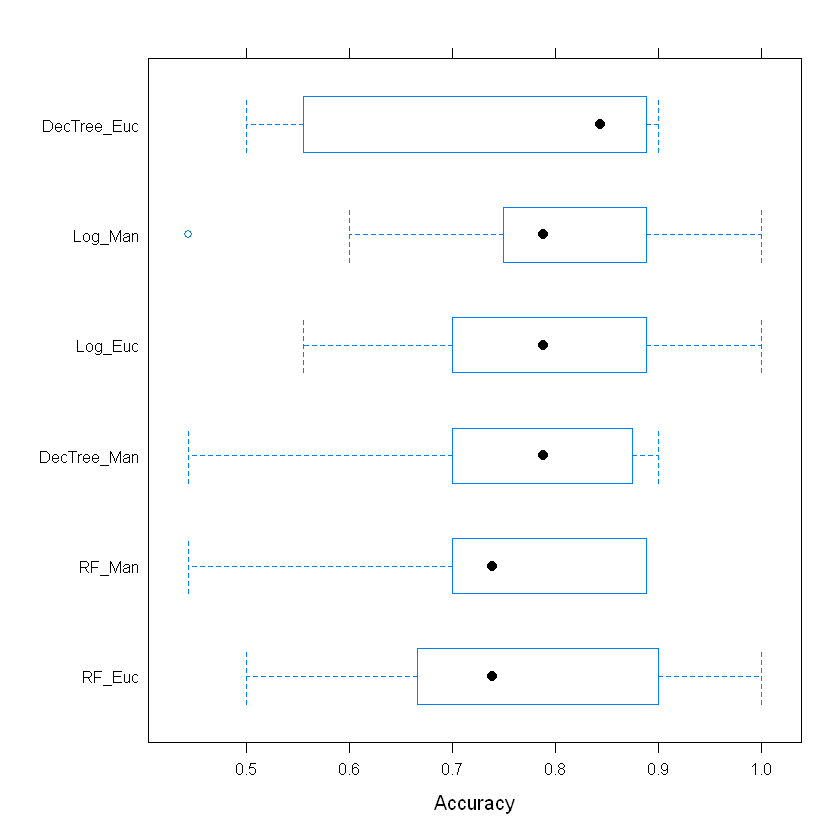

In [59]:
bwplot(myreport2 , metric = "Accuracy", horizontal = T)

 #### The above plot shows the accuracy of the models with the best set of parameters.
 
 #### Considering the mean accuracy, all of the models are quite close to each other.
 
 #### A better reprsentation of this comparision can be observed on the plot above, which shows not only the mean values but distribution characteristics of each model's accuracy. 
 

   *The mean accuracy was the highest for Log_Euc: Logistic regression model using Euclidean representation. Its first and third quartile values do not spread too far, the model may qualify as reliable. It should be noted that its accuracy has a spread ranged from min= 0.56  to max=1, among the samples. 
   
   *The mean accuracy of Log_Man: Logistic regression model using Manhattan representation is still quite good. Its first and third quartile values are even tighter. The model may qualify as reliable.
   
   *DecTree_Euc as the highest median in terms of accuracy value among these models. But, it spreads to a very wide range, its result may not be robust and reliable.
   
   The above plot enables to make such comparisions. 
 
It should be noted that, accuracy is only checked on traing data (cross-validated), however none of the models were tested on a test data and a comparison of models on unseen data could not be done.

#### References:

Küçükaşcı, Emel Şeyma,and Mustafa Gökçe Baydoğan. "Bag encoding strategies in multiple instance learning problems."
Information Sciences 467 (2018): 559-578. (https://doi.org/10.1016/j.ins.2018.08.020)

K-medoids: (https://en.wikipedia.org/wiki/K-medoids)

K-Medoids in R: Step-by-Step:(https://www.statology.org/k-medoids-in-r/)